<a href="https://colab.research.google.com/github/carlschroedl/computational-redistricting/blob/main/wisconsin_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -O 'https://legis.wisconsin.gov/ltsb/gisdocs/Data2020/WI_WARDS_2020_TIGER_PL94171_DOJ_Fields.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.8M  100 15.8M    0     0  4902k      0  0:00:03  0:00:03 --:--:-- 4901k


In [ ]:
!curl -O 'https://raw.githubusercontent.com/alarm-redist/census-2020/main/vest-2020/wi/wi_2020_2020_vtd.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  410k  100  410k    0     0  1565k      0 --:--:-- --:--:-- --:--:-- 1565k


In [ ]:
# https://data-ltsb.opendata.arcgis.com/datasets/2012-2020-election-data-with-2020-wards/explore
!curl --output '2012-2020_Election_Data_with_2020_Wards.zip' -O 'https://opendata.arcgis.com/api/v3/datasets/f67c2e7f43bb432687b4a42bee50a16c_0/downloads/data?format=shp&spatialRefId=3857' \
  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.5M    0 21.5M    0     0  22.8M      0 --:--:-- --:--:-- --:--:-- 22.8M


In [ ]:
!pip install geopandas matplotlib gerrychain maup

In [ ]:
import os
import geopandas
import pandas
import matplotlib.pyplot as plt
import numpy as np
import gerrychain
import maup

In [ ]:
wards = geopandas.read_file('WI_WARDS_2020_TIGER_PL94171_DOJ_Fields.zip')

In [ ]:
#votes = pandas.read_csv('wi_2020_2020_vtd.csv')

In [ ]:
print(wards.info())
print(wards['GEOID'].head())
print(wards['WARDID'].head())
print(set(wards['GEOID']) == set(wards['WARDID']))


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7136 entries, 0 to 7135
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOID       7136 non-null   object  
 1   WARDID      7136 non-null   object  
 2   CNTY_FIPS   7136 non-null   object  
 3   CNTY_NAME   7136 non-null   object  
 4   MCD_FIPS    7136 non-null   object  
 5   MCD_NAME    7136 non-null   object  
 6   COUSUBFP    7136 non-null   object  
 7   LSAD        7136 non-null   object  
 8   CTV         7136 non-null   object  
 9   ASM         7136 non-null   object  
 10  SEN         7136 non-null   object  
 11  CON         7136 non-null   object  
 12  LABEL       7136 non-null   object  
 13  STR_WARDS   7136 non-null   object  
 14  DISTRICT    7136 non-null   object  
 15  PERSONS     7136 non-null   int64   
 16  HISPANIC    7136 non-null   int64   
 17  WHITE       7136 non-null   int64   
 18  BLACK       7136 non-null   int64   
 19

In [ ]:
state_election_data = geopandas.read_file('2012-2020_Election_Data_with_2020_Wards.zip')

In [ ]:
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
maup.progress.enabled = True
without_overlaps_or_gaps = maup.autorepair(state_election_data)



100%|██████████| 7078/7078 [00:20<00:00, 349.08it/s]
/usr/local/lib/python3.7/dist-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
100%|██████████| 7078/7078 [00:24<00:00, 283.34it/s]
/usr/local/lib/python3.7/dist-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [ ]:
without_overlaps_or_gaps.to_file('repaired_2012-2020_Election_Data_with_2020_Wards.zip')

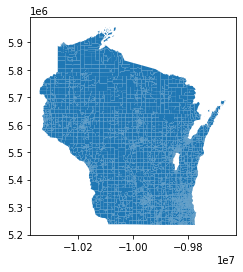

In [ ]:
without_overlaps_or_gaps_df = geopandas.GeoDataFrame(without_overlaps_or_gaps)
without_overlaps_or_gaps_df.plot()
#graph = gerrychain.Graph.from_geodataframe(without_overlaps_or_gaps_df)
# print(state_election_data.info(verbose=True, null_counts=True))
# print('total population')
# print(state_election_data['PERSONS'].sum())
# graph = gerrychain.Graph.from_file('2012-2020_Election_Data_with_2020_Wards.zip')

#print(list(state_election_data.columns)[0:20])
#print(state_election_data['GEOID'].head())

In [ ]:
state_election_ward_ids = set(state_election_data['GEOID'])
state_ward_ids = set(wards['GEOID'])
wards_only_ward_ids = state_ward_ids - state_election_ward_ids
print(len(wards_only_ward_ids))
state_election_only_ward_ids = state_election_ward_ids - state_ward_ids
print(len(state_election_only_ward_ids))

In [ ]:
print(len([(1056, 1153), (5177, 5181), (4322, 4326), (795, 814), (1956, 1957), (4541, 4542), (2850, 2851), (1805, 1875), (586, 800), (5859, 5861), (6902, 6915), (793, 811), (5176, 5181), (5626, 5627), (5519, 5570), (6066, 6082), (2260, 2261), (5172, 5173), (5453, 5465), (5766, 5770), (5820, 5834), (6964, 6965), (5103, 5149), (6910, 6928), (1056, 1065), (2693, 2785), (1407, 1418), (2511, 2545), (2955, 3014), (5407, 5436), (5524, 5531), (3021, 3023), (824, 826), (1336, 1391), (1360, 1410), (2062, 2063), (5746, 5747), (6864, 6867), (2149, 2152), (5001, 5031), (2337, 2338), (3890, 3895), (2775, 2780), (5710, 5721), (2113, 2119), (3019, 3023), (43, 57), (5327, 5328), (1814, 1815), (4970, 4971), (3900, 3965), (5524, 5533), (6920, 6921), (5755, 5759), (1380, 1409), (1041, 1092), (2760, 2788), (2836, 2837), (83, 89), (493, 531), (1058, 1071), (5457, 5499), (475, 476), (140, 149), (1740, 1742), (5172, 5174), (93, 147), (1711, 1716), (2148, 2152), (3882, 3914), (4968, 4971), (1058, 1099), (4562, 4612), (5452, 5465), (6785, 6828), (2864, 2881), (2284, 2308), (3022, 3023), (1056, 1066), (3906, 3907), (5568, 5631), (6722, 6723), (6911, 6932), (2007, 2008), (2131, 2132), (2631, 2633), (85, 89), (2266, 2267), (1741, 1742), (6684, 6812), (6749, 6752), (825, 826), (1053, 1153), (6859, 6868), (6116, 6307), (2847, 2849), (4900, 5308), (590, 606), (5342, 5390), (716, 762), (1059, 1098), (6717, 6718), (474, 476), (2525, 2550), (6785, 6821), (1341, 1442), (1966, 1967), (3905, 3910), (3998, 3999), (5518, 5570), (4730, 4748), (2848, 2849), (2846, 2849), (4179, 4284), (2966, 2971), (5468, 5475), (5712, 5721), (551, 552), (6615, 6712), (87, 89), (6599, 6606), (276, 278), (5175, 5181), (1041, 1153), (3049, 3050), (3074, 3075), (1041, 1068), (1115, 1123), (3020, 3023), (82, 89), (5165, 5166), (5178, 5181), (1062, 1151), (3922, 3940), (5552, 5565), (5520, 5564), (2032, 2038), (2179, 2194), (1259, 1268), (4898, 5307), (6735, 6736), (4160, 4315), (84, 89), (5110, 5111), (6684, 6813), (6588, 6601), (1024, 1106), (2763, 2775), (6129, 6134), (81, 89), (1958, 2040), (2027, 2030), (4460, 4490), (447, 448), (1343, 1344), (5524, 5530), (2490, 2830), (2886, 2887), (844, 1198), (4324, 4326), (6901, 6912), (108, 109), (6785, 6820), (5653, 5673), (7015, 7038), (4883, 4889), (1058, 1091), (4969, 4971), (6785, 6825), (944, 948), (2031, 2032), (2336, 2338), (1663, 1802), (3882, 3932), (4296, 4303), (5569, 5631), (6191, 6225), (5711, 5721), (4453, 4454), (6900, 6914), (1824, 1875), (1965, 1967), (3885, 3975), (830, 831), (1854, 1855), (4686, 4687), (6983, 7007), (5858, 5861), (4563, 4564), (455, 457), (2017, 2018), (2369, 2421), (86, 89), (5131, 5137), (5402, 5403), (1062, 1094), (789, 790), (2537, 2607), (1057, 1070), (5099, 5148), (2154, 2169), (1944, 1945), (4437, 4452), (5524, 5532), (4323, 4326), (1872, 1876), (6883, 6919), (4048, 4088), (2043, 2044), (2688, 2690)]))
wards[~wards['GEOID'].isin(wards_only_ward_ids)].plot()
# wards_only_ward_ids = pandas.DataFrame({
#     'GEOID': np.array(list(wards_only_ward_ids), dtype=object)
# })

# print(wards_only_ward_ids.info())
# outlier_wards = pandas.merge(wards, state_election_data, on='GEOID', how = 'outer')
# print(len(outlier_wards))
# outlier_wards.plot()
# print(wards_only_ward_ids)

210


NameError: ignored